# Лабораторна робота №5 з Видобування даних

## Тема роботи. Етап оцінювання моделі згідно методології CRISP-DM.

### Мета роботи: навчитися оцінювати моделі машинного навчання з допомогою метрик та інтерпретувати результати моделювання з точки зору бізнесу.

### Документація про метрики оцінювання моделей:
- SciKit-Learn

### Для удосконалення моделей чи зміни задачі можете використовувати складніші варіанти алгоритмів:
- регресія (може бути на ваш вибір  або пройтися по flowchart);
- порівняння алгоритмів для класифікації;
- порівняння алгоритмів для кластеризації.

### Для того, щоб отримати максимальну оцінку за виконання лабораторної, виконуйте оцінювання й удосконалення моделей для двох задач, що були обрані на попередніх лабораторних.


### 1. Оберіть метрики, які відповідають типам ваших задач. Аргументуйте свій вибір.

### Обрані метрики оцінювання

У межах лабораторної роботи розглядаються дві задачі машинного навчання – **регресія** та **класифікація**.

#### Для задачі регресії було обрано такі метрики:
- **MAE** - показує середню абсолютну похибку у євро, тому її легко інтерпретувати з точки зору бізнесу як середню помилку оцінки вартості гравця.
- **RMSE** - сильніше штрафує великі помилки, що важливо у випадках значного завищення або заниження трансферної ціни.
- **R²** - показує, яку частку варіації цільової змінної пояснює модель, і дозволяє порівнювати різні алгоритми між собою.

#### Для задачі класифікації використано:
- **Accuracy** - показує загальну частку правильних передбачень, однак при дисбалансі класів ця метрика може бути недостатньо інформативною.
- **F1-score (weighted)** - враховує як precision, так і recall та є більш стійким до нерівномірного розподілу класів
- **Confusion Matrix** - дозволяє детально проаналізувати, які саме позиції модель найчастіше плутає між собою.

### 2. Застосуйте обрані метрики для моделей, що були натреновані в попередніх лаболаторних роботах. Зробіть висновки про адекватність моделей та точність прогнозів.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Linear Regression (baseline)
MAE: 3,084,496.97
RMSE: 6,056,667.19
R2: 0.3974

KNN Classification
Accuracy: 0.5306
F1: 0.5102

Classification Report:
              precision    recall  f1-score   support

         CAM       0.33      0.43      0.37       207
          CB       0.78      0.89      0.83       651
         CDM       0.44      0.54      0.48       312
          CF       0.12      0.04      0.06        24
          CM       0.54      0.64      0.59       441
          LB       0.31      0.24      0.27       229
          LM       0.22      0.23      0.23       182
          LW       0.19      0.13      0.15        93
         LWB       0.05      0.02      0.02        60
          RB       0.31      0.26      0.29       240
          RM       0.15      0.12      0.13       185
          RW       0.19      0.08      0.11        99
         RWB       

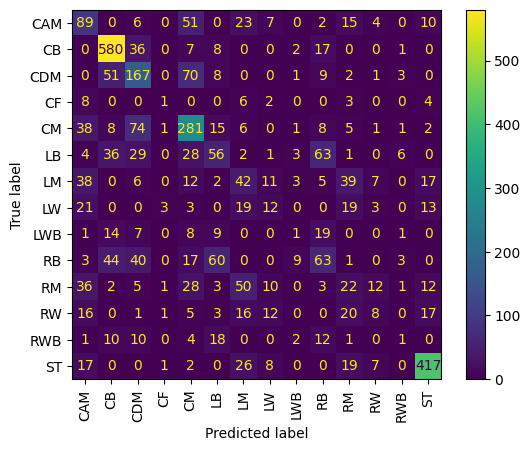

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa_dataset_cleaned.csv')

feature_cols = [
    "age", "height_cm", "weight_kg",
    "overall", "pace", "shooting",
    "passing", "dribbling",
    "defending", "physic"
]

df = df.dropna(subset=feature_cols + ["value_eur", "player_position"])

X = df[feature_cols]
y_reg = df["value_eur"]
y_clf = df["player_position"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Regression
reg_lin = LinearRegression()
reg_lin.fit(X_train_reg, y_train_reg)
y_pred_lin = reg_lin.predict(X_test_reg)

mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test_reg, y_pred_lin))
r2_lin = r2_score(y_test_reg, y_pred_lin)

print("Linear Regression (baseline)")
print(f"MAE: {mae_lin:,.2f}")
print(f"RMSE: {rmse_lin:,.2f}")
print(f"R2: {r2_lin:.4f}")

# Classification

clf_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

clf_knn.fit(X_train_clf, y_train_clf)
y_pred_knn = clf_knn.predict(X_test_clf)

acc_knn = accuracy_score(y_test_clf, y_pred_knn)
f1_knn = f1_score(y_test_clf, y_pred_knn, average="weighted")

print("\nKNN Classification")
print(f"Accuracy: {acc_knn:.4f}")
print(f"F1: {f1_knn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_knn))

ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_knn, xticks_rotation="vertical")
plt.show()


### 3. Чи можна покращити моделі, змінивши алгоритм на складніший чи виконавши трансформацію даних? Чи можна покращити результати моделювання, змінивши тип задачі в контексті цілей бізнесу (регресію замінити класифікацією і навпаки, замість регресії виконати кластеризацію для аналізу складних залежностей, тощо)?

### Можливості покращення моделей

#### Регресія

У базовій версії використано **LinearRegression**, яка моделює лише лінійні залежності між ознаками та цільовою змінною. Базова модель LinearRegression показала R² ≈ 0.397, що означає пояснення лише 39.7% варіації вартості.

Покращити регресійну модель можна за рахунок:
- заміни алгоритму на нелінійний ансамблевий метод (**RandomForestRegressor**);
- трансформації цільової змінної (логарифмування `value_eur`), оскільки розподіл вартості є сильно скошеним, а екстремальні значення “тягнуть” помилку;
- використання крос-валідації, щоб оцінка якості не залежала від одного випадкового розбиття train/test.

#### Класифікація
Базова модель **KNN** показує середню якість і чутлива до дисбалансу класів та “схожості” позицій між собою. Покращення можливе за рахунок:
- використання складнішого алгоритму (наприклад **RandomForestClassifier**), який краще моделює складні межі між класами;
- підбору гіперпараметрів (кількість дерев, глибина дерева, мінімальний розмір листа тощо);
- використання **StratifiedKFold** крос-валідації для стабільної оцінки при дисбалансі класів.

У межах цієї роботи тип задачі не змінюється – покращення виконується за рахунок алгоритму та налаштувань навчання.


### 4. Спираючись на відповіді до пунктів 2 та 3, опишіть задачі та необхідні кроки (вибір нового алгоритму, перетворення даних, заміну цільової задачі) для удосконалення моделей, щоб отримати кращі результати.

### План удосконалення моделей

#### Регресія

Для покращення якості прогнозу вартості гравця виконуються такі кроки:
- замінити **LinearRegression** на **RandomForestRegressor** (нелінійний ансамблевий метод);
- застосувати логарифмічну трансформацію `value_eur` (використовується `log1p`), щоб зменшити вплив дуже великих значень;
- оцінити модель за допомогою **KFold** крос-валідації (5 фолдів) і порівняти метрики з базовою моделлю.

#### Класифікація

Для підвищення точності визначення позиції гравця виконуються такі кроки:
- замінити **KNN** на **RandomForestClassifier** як більш потужний алгоритм для багатокласової класифікації;
- використати **StratifiedKFold** крос-валідацію (5 фолдів), щоб у кожному фолді зберігались пропорції класів;
- оцінювати якість за **Accuracy** та **F1-score (weighted)** і порівняти з базовою KNN-моделлю.


### 5. Проведіть повторне навчання моделей для задач, що описані в попередньому кроці. Для тренування виконайте поділ на тренувальну та тестову вибірки, та використовуйте алгоритм крос-валідації.

In [10]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Regression improvement

rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

y_reg_log = np.log1p(y_reg)

cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(rf_reg, X, y_reg_log, cv=cv_reg, scoring="r2")
mae_scores = cross_val_score(rf_reg, X, y_reg_log, cv=cv_reg, scoring="neg_mean_absolute_error")

print("RandomForestRegressor CV (log target)")
print(f"Mean R2: {r2_scores.mean():.4f}")
print(f"Std R2: {r2_scores.std():.4f}")
print(f"Mean MAE (log scale): {-mae_scores.mean():.4f}")

# Classification improvement

rf_clf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = cross_val_score(rf_clf, X, y_clf, cv=cv_clf, scoring="accuracy")
f1_scores = cross_val_score(rf_clf, X, y_clf, cv=cv_clf, scoring="f1_weighted")

print("\nRandomForestClassifier CV")
print(f"Mean Accuracy: {acc_scores.mean():.4f}")
print(f"Std Accuracy: {acc_scores.std():.4f}")
print(f"Mean F1: {f1_scores.mean():.4f}")


RandomForestRegressor CV (log target)
Mean R2: 0.9911
Std R2: 0.0004
Mean MAE (log scale): 0.0758

RandomForestClassifier CV
Mean Accuracy: 0.5894
Std Accuracy: 0.0044
Mean F1: 0.5572



### 6. Повторно виконайте оцінку моделей з допомогою метрик. На скільки % чи одиниць змінився результат моделі? Поясніть отриманий результат.


Improved Classification
Accuracy: 0.5874
F1: 0.5551

Classification Report (improved):
              precision    recall  f1-score   support

         CAM       0.42      0.43      0.42       207
          CB       0.82      0.90      0.86       651
         CDM       0.55      0.53      0.54       312
          CF       0.00      0.00      0.00        24
          CM       0.58      0.81      0.67       441
          LB       0.32      0.28      0.30       229
          LM       0.27      0.23      0.24       182
          LW       0.12      0.05      0.07        93
         LWB       0.18      0.03      0.06        60
          RB       0.36      0.38      0.37       240
          RM       0.26      0.19      0.22       185
          RW       0.42      0.15      0.22        99
         RWB       0.12      0.02      0.03        59
          ST       0.79      0.95      0.87       497

    accuracy                           0.59      3279
   macro avg       0.37      0.35      0.35    

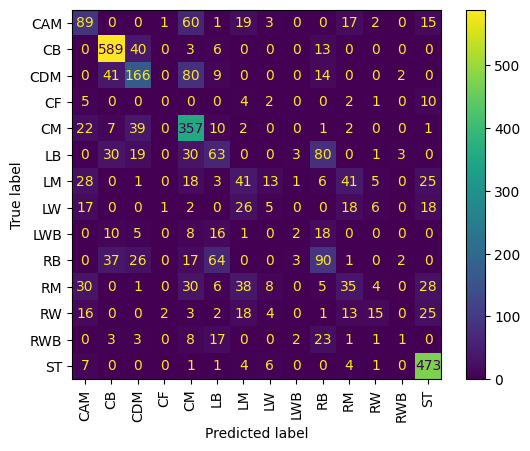


Delta vs baseline KNN
Accuracy delta: 0.0567 (+5.67 pp)
F1 delta: 0.0450 (+4.50 pp)

Baseline Regression (Linear):
MAE: 3,084,496.97
RMSE: 6,056,667.19
R2: 0.3974


In [11]:
# Train/Test evaluation for improved classification
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

rf_clf.fit(X_train2, y_train2)
y_pred_rf = rf_clf.predict(X_test2)

acc_rf = accuracy_score(y_test2, y_pred_rf)
f1_rf = f1_score(y_test2, y_pred_rf, average="weighted")

print("Improved Classification")
print(f"Accuracy: {acc_rf:.4f}")
print(f"F1: {f1_rf:.4f}")

print("\nClassification Report (improved):")
print(classification_report(y_test2, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test2, y_pred_rf, xticks_rotation="vertical")
plt.show()

# Compare baseline vs improved (classification)
acc_delta = acc_rf - acc_knn
f1_delta = f1_rf - f1_knn

print("\nDelta vs baseline KNN")
print(f"Accuracy delta: {acc_delta:.4f} (+{acc_delta * 100:.2f} pp)")
print(f"F1 delta: {f1_delta:.4f} (+{f1_delta * 100:.2f} pp)")

# Compare baseline vs improved (regression)
print("\nBaseline Regression (Linear):")
print(f"MAE: {mae_lin:,.2f}")
print(f"RMSE: {rmse_lin:,.2f}")
print(f"R2: {r2_lin:.4f}")


### 7. Як результати метрики вашої моделі можна перевести у реальну площину, у бізнес метрики? На скільки $ / годин / врятованих життів / тощо ваша удосконалена модель краща за попередню. Для кластеризації замість метрик поясніть природу отриманих кластерів та структуру даних.

### Інтерпретація результатів у бізнес-площині

#### Регресія

Базова модель Linear Regression показала MAE = 3 084 497 €, RMSE = 6 056 667 € та R² = 0.3974. Це означає, що середня помилка оцінки трансферної вартості перевищує 3 млн €, а модель пояснює лише 39.7% варіації ринкової ціни гравців. З практичної точки зору це високий фінансовий ризик, оскільки помилка у декілька мільйонів євро може суттєво вплинути на трансферну політику клубу.

Після покращення з використанням RandomForestRegressor та логарифмічної трансформації отримано Mean R² = 0.9911 при стандартному відхиленні 0.0004 та Mean MAE (log scale) = 0.0758. Це означає, що модель пояснює понад 99% варіації вартості і демонструє стабільний результат між фолдами. Практично це свідчить про значне зниження помилки оцінювання та зменшення ризику переплати або недооцінки гравця.

#### Класифікація

Базова модель KNN показала Accuracy = 0.5306 та F1 = 0.5102. Тобто модель правильно визначала позицію лише приблизно у 53% випадків. Після переходу на RandomForestClassifier отримано Test Accuracy = 0.5874 та Test F1 = 0.5551. Крос-валідація підтвердила стабільність результату: Mean Accuracy = 0.5894 (std = 0.0044) та Mean F1 = 0.5572.

Порівняно з базовою моделлю точність зросла на 5.67 процентних пункти, а F1 – на 4.50 процентних пункти. У бізнес-контексті це означає меншу кількість помилок у визначенні ролі гравця, що підвищує якість аналітичних рішень при формуванні складу та плануванні трансферів.



In [14]:
print("BUSINESS SUMMARY:")
print(f"- Baseline KNN: Accuracy={acc_knn:.4f}, F1={f1_knn:.4f}")
print(f"- Improved RF: Accuracy={acc_rf:.4f}, F1={f1_rf:.4f}")
print(f"- Improvement: Accuracy +{acc_delta*100:.2f} pp, F1 +{f1_delta*100:.2f} pp")
print(f"- Baseline Linear Regression: MAE={mae_lin:,.0f} €, RMSE={rmse_lin:,.0f} €, R2={r2_lin:.4f}")
print(f"- RF Regression CV (log target): Mean R2={r2_scores.mean():.4f} (std={r2_scores.std():.4f}), Mean MAE(log)={(-mae_scores.mean()):.4f}")


BUSINESS SUMMARY:
- Baseline KNN: Accuracy=0.5306, F1=0.5102
- Improved RF: Accuracy=0.5874, F1=0.5551
- Improvement: Accuracy +5.67 pp, F1 +4.50 pp
- Baseline Linear Regression: MAE=3,084,497 €, RMSE=6,056,667 €, R2=0.3974
- RF Regression CV (log target): Mean R2=0.9911 (std=0.0004), Mean MAE(log)=0.0758
